/tmp/ipykernel_6330/1233111535.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for k in range(np.int(np.max(amplitude)), np.int(np.min(amplitude)), -1):


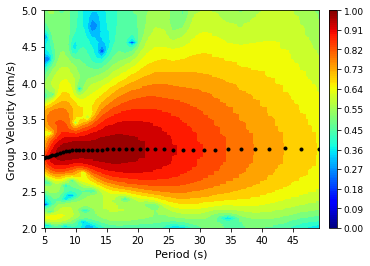

In [40]:
###### load required modules ######
import numpy as np
from obspy.core import read, Trace
from obspy.signal.tf_misfit import cwt
import matplotlib.pyplot as plt
from matplotlib import colors

#### Read your data ####
r=read('/home/priyanshu/AAM_CBN.sac')
r.normalize()
header=r[0].stats
y=r[0].data
d=header.sac['dist']
dt=header.sac['delta']

###### Select number of filters (wavelet scales show wavelet filters corresponding to each scale) #####
scale=40

##### Select the range of frequencies for dispersion curve #####
fmin=0.02
fmax=0.2

##### Filtering data using wavelet filters and estimating dispersion curve #####
wave, scales= cwt(y, dt=dt, w0=6, fmin=fmin, fmax=fmax, nf=scale)
periods=1.03*scales ### follows only in case of complex Morlet wavelet
arr=[]
velocity=np.zeros(len(y))
points=np.zeros(scale)
vg=np.zeros(scale)
amplitude=np.zeros(len(y))
for i in range (0, scale):
    amplitude=20*(np.log10(np.abs(wave[i])))
    amplist=amplitude.tolist()
    
##### Data discretization to improve resolution of the dispersion image #####  
    for j in range(len(amplitude)):
        for k in range(np.int(np.max(amplitude)), np.int(np.min(amplitude)), -1):
            if k > amplitude[j] > k-1:
                amplitude[j]=k-1
    arr.append(amplitude)
    points[i]=points[i]+np.argmax(np.abs(wave[i]))
vg=(1/dt)*d/points
arr=np.array(arr)
arr=arr.T

##### calculating velocities #####
for k in range(len(y)):
    velocity[k] = velocity[k] + (d/(k+1))
    
###### plotting dispersion image #####    

plt.plot(periods, vg, 'k.')
periods, velocity= np.meshgrid(periods, velocity)
min_level=np.min(arr)
max_level=np.max(arr)
step_level=5
a=plt.contourf(periods, velocity, arr, levels = np.arange(min_level, max_level + step_level, step_level),cmap='jet')
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(arr)
m.set_clim(0, 1.0)
myticks = np.arange(0, 1, 12)
cbar=plt.colorbar(m, boundaries=np.linspace(0, 1, 120), ticks=[0, 0.09,.18, .27, .36, .45,.55,.64,.73,.82,.91, 1],pad=.03, aspect=28)
cbar.ax.tick_params(labelsize=9, direction='out')
# cbar.ax.set_ticklabels(x.astype('%.2f'))
plt.xlabel('Period (s)', fontsize=11)
plt.ylabel('Group Velocity (km/s)', fontsize=11)
plt.ylim(2,5)
plt.show()